# Is This Normal? Testing the Ability of GANs to Learn a 1D Parametric Distribution

Below is the code used as part of training and visualization for the project "Is This Normal? Testing the Ability of GANs to Learn a 1D Parametric Distribution".

In [1]:
# To save trained models to goodl drive
from google.colab import drive
drive.mount('/content/drive')

# Manually uploaded to Google Colab session storage
from gan import *

Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Original GAN

Original GAN training:
* Vanilla generator and discriminator loss
* 4-layer MLP for both generator and discriminator
* 5:1 critic/discriminator training
* Adam with betas (0, 0.9)
* Learning rate 1e-5
* Batch size 256
* 50,000 training iterations

In [ ]:
vanilla_generator = gan_model()
vanilla_discriminator = gan_model()

vanilla_training = train_gan_gp(g_model=vanilla_generator, d_model=vanilla_discriminator, g_loss_func=vanilla_gen_loss, \
                                d_loss_func=critic_loss, n_steps=50000, lr=1e-4, bs=256, gp=0, clip=False, \
                                sample_noise=sample_uniform, sample_true=sample_gaussian, cdf_true=norm_cdf)

100% (50000 of 50000) |##################| Elapsed Time: 0:14:46 Time:  0:14:46


Below and for all other GANs, I will visualize training dynamics. While this won't be included in the final product, I think it's important to check that training looks normal and that a model isn't inhibited by a dramatically mistuned hyperparameter. The overall purpose of this project is to see the ability of common GANs to learn a distribution, which should assume acceptable model capacity, training iterations, and hyperparameter combinations.

In [ ]:
interact(visualize_training, training_results=fixed(vanilla_training[:3]), \
         iterations = (0,50000,1000), pdf_func=fixed(norm_pdf), xlim=fixed((-3,3)))

interactive(children=(IntSlider(value=25000, description='iterations', max=50000, step=1000), Output()), _dom_…

<function gan.visualize_training>

In [ ]:
save_gan(vanilla_generator, "vanilla-gan")

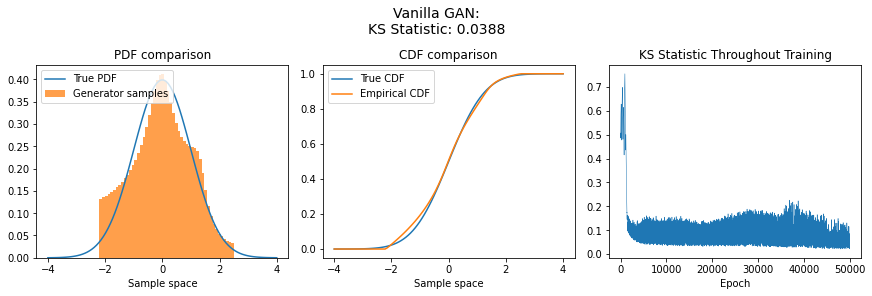

In [ ]:
s = visualize_gan(vanilla_generator, "Vanilla GAN", ks_values=vanilla_training[-1])

## 2. Non-saturating GAN

Non-saturating GAN training:
* Non-saturating generator loss
* Otherwise same training setup

In [ ]:
nonsaturating_generator = gan_model()
nonsaturating_discriminator = gan_model()

nonsaturating_training = train_gan_gp(g_model=nonsaturating_generator, d_model=nonsaturating_discriminator, \
                                      g_loss_func=unsaturating_gen_loss, d_loss_func=critic_loss, n_steps=50000,
                                      lr=1e-4, bs=256, gp=0, clip=False, sample_noise=sample_uniform, \
                                      sample_true=sample_gaussian, cdf_true=norm_cdf)

100% (50000 of 50000) |##################| Elapsed Time: 0:14:52 Time:  0:14:52


In [ ]:
interact(visualize_training, training_results=fixed(nonsaturating_training[:3]), \
         iterations = (0,50000,1000), pdf_func=fixed(norm_pdf), xlim=fixed((-3,3)))

interactive(children=(IntSlider(value=25000, description='iterations', max=50000, step=1000), Output()), _dom_…

<function gan.visualize_training>

In [ ]:
save_gan(nonsaturating_generator, "nonsaturating-gan")

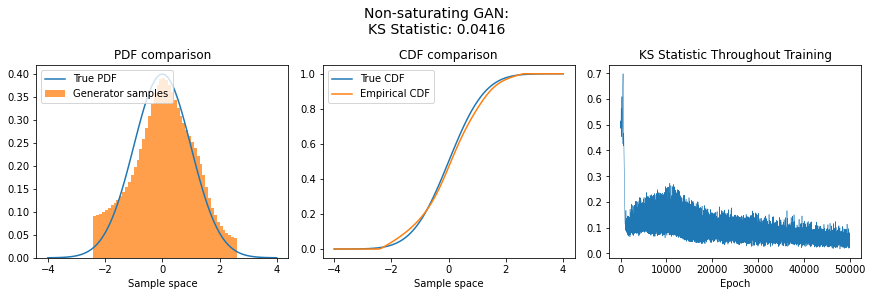

In [ ]:
s = visualize_gan(nonsaturating_generator, "Non-saturating GAN", ks_values=nonsaturating_training[-1])

## 3. Wasserstein GAN

Wasserstein GAN training:
* Wasserstein critic loss (generates better approximation of Wasserstein distance) and generator loss (descends distance approximation)
* Weight clipping (between $[-0.01,0.01]$) for critic model
* Otherwise same training setup

In [2]:
w_generator = gan_model()
w_critic = gan_model()

w_training = train_gan_gp(w_generator, w_critic, g_loss_func=wgan_gen_loss, d_loss_func=wgan_critic_loss, \
                           n_steps=50000, lr=1e-4, bs=256, gp=10, clip=0.01, sample_noise=sample_uniform, \
                           sample_true=sample_gaussian, cdf_true=norm_cdf)

100% (50000 of 50000) |##################| Elapsed Time: 0:19:46 Time:  0:19:46


In [3]:
interact(visualize_training, training_results=fixed(w_training[:3]), \
         iterations = (0,50000,1000), pdf_func=fixed(norm_pdf), xlim=fixed((-3,3)))

interactive(children=(IntSlider(value=25000, description='iterations', max=50000, step=1000), Output()), _dom_…

<function gan.visualize_training>

In [4]:
save_gan(w_generator, "wasserstein-gan")

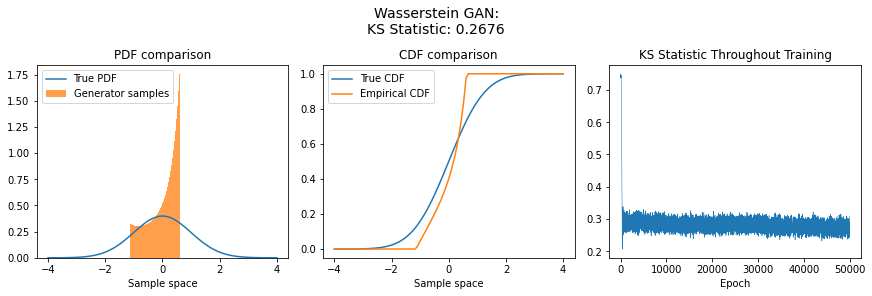

In [5]:
s = visualize_gan(w_generator, "Wasserstein GAN", ks_values=w_training[-1])

## 4. GAN with Gradient Penalty

GAN with gradient penalty training:
* Non-saturating generator loss
* Gradient penalty term on discriminator loss
* Otherwise same training setup

In [ ]:
gp_generator = gan_model()
gp_discriminator = gan_model()

gp_training = train_gan_gp(gp_generator, gp_discriminator, g_loss_func=unsaturating_gen_loss, d_loss_func=critic_loss, \
                           n_steps=50000, lr=1e-4, bs=256, gp=10, clip=False, sample_noise=sample_uniform, \
                           sample_true=sample_gaussian, cdf_true=norm_cdf)

100% (50000 of 50000) |##################| Elapsed Time: 0:18:47 Time:  0:18:47


In [ ]:
interact(visualize_training, training_results=fixed(gp_training[:3]), \
         iterations=(0,50000,1000), pdf_func=fixed(norm_pdf), xlim=fixed((-3,3)))

interactive(children=(IntSlider(value=25000, description='iterations', max=50000, step=1000), Output()), _dom_…

<function gan.visualize_training>

In [ ]:
save_gan(gp_generator, "gan-gp")

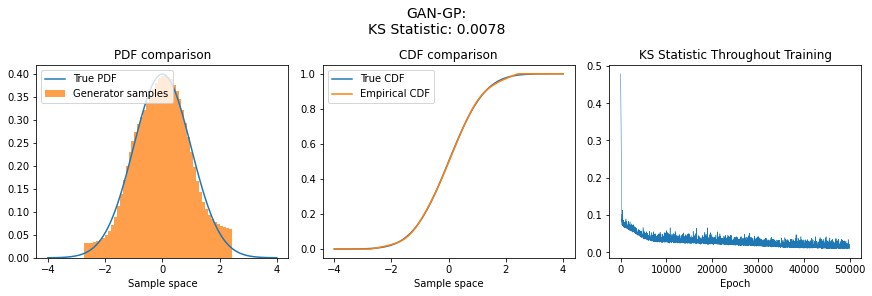

In [ ]:
s = visualize_gan(gp_generator, "GAN-GP", ks_values=gp_training[-1])